In [ ]:
import pandas as pd
df=pd.read_csv("/content/placementdata.csv")
df

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


In [ ]:
df.isnull().sum()

,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['ExtracurricularActivities']=df['ExtracurricularActivities'].map({'No':0,'Yes':1})


In [ ]:
df['PlacementTraining']=df['PlacementTraining'].map({'No':0,'Yes':1})

In [ ]:
df['PlacementStatus']=df['PlacementStatus'].map({'NotPlaced':0,'Placed':1})

<Axes: >

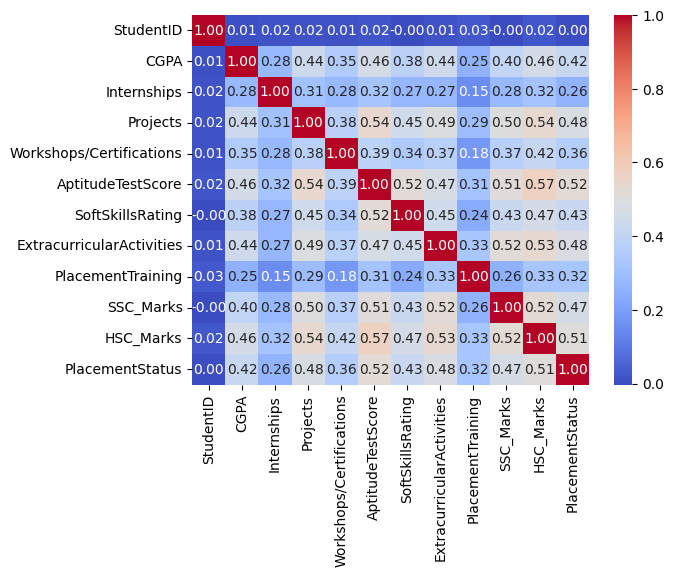

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm')

In [ ]:
df.drop(columns=['StudentID'],inplace=True)

In [ ]:
x=df.drop(columns=['PlacementStatus'])
y=df['PlacementStatus']

In [ ]:
df.columns

Index(['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
       'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities',
       'PlacementTraining', 'SSC_Marks', 'HSC_Marks', 'PlacementStatus'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x=scale.fit_transform(x)

In [ ]:
x

array([[0.38461538, 0.5       , 0.33333333, ..., 0.        , 0.17142857,
        0.70967742],
       [0.92307692, 0.        , 1.        , ..., 1.        , 0.65714286,
        0.80645161],
       [0.30769231, 0.5       , 0.66666667, ..., 0.        , 0.68571429,
        0.74193548],
       ...,
       [0.73076923, 0.5       , 1.        , ..., 1.        , 0.68571429,
        0.77419355],
       [0.92307692, 0.        , 1.        , ..., 1.        , 0.45714286,
        0.90322581],
       [0.73076923, 0.        , 0.33333333, ..., 0.        , 0.2       ,
        0.29032258]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='poly')

In [ ]:
model.fit(x_train,y_train)

SVC(kernel='poly')

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score
print("accuracy",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))

accuracy 0.792
precision_score 0.7634271099744245
